# Modeling twitter dynamics

The premise:

* People are on a political spectrum
* Over time they both shift towards the opinions of their peers...
* ...and actively follow / unfollow people based on their opinions (on whether they feel stressfull, or in-bubble).
* We want to see the evolution of political opinions over time

In [1]:
import numpy as np
import matplotlib.pyplot as plt

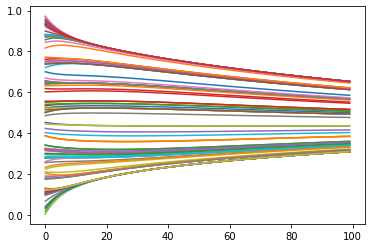

In [218]:
n_people = 100
n_time = 100
n_friends = 25
alpha = 0.2
p_refriend = 1

do_unfriend = False
do_influencer = False

opinion = np.zeros((n_time, n_people))
opinion[0, :] = np.random.uniform(size=n_people)
#opinion[0, :] = np.linspace(0, 1, n_people)

friends = {}
for i in range(n_people):
    queue = list(np.argsort(np.abs(opinion[0,:] - opinion[0,i])))
    queue.remove(i) # No self-friendship
    friends[i] = queue[:n_friends]

for t in range(1, n_time):
    for i in range(n_people):
        opinion[t, i] = (1-alpha)*opinion[t-1, i] + alpha*np.mean(opinion[t-1, friends[i]])
        # First need to fully update, then friend / unfriend
    if do_unfriend:
        for i in range(n_people):
            if np.random.uniform() < p_refriend:
                if do_influencer: # Add a person most popular with friends
                    hist = {}
                    forbidden = set(friends[i] + [i]) # Those are already befriended
                    for j in friends[i]:
                        for k in friends[j]:
                            if k not in forbidden:
                                hist[k] = hist.get(k,0) + 1
                    if not hist: # This bubble is too bubbly: a full graph, no one to add
                        hist = {np.random.randint(n_people): 1} # Add a random person 
                    #queue = sorted([(val,key) for key,val in hist.items()])
                    #queue = [(key,val) for (val,key) in queue if val==queue[-1][0]]
                    #best = queue[np.random.randint(len(queue))][0]
                    best = max([(val,key) for key,val in hist.items()])[1]
                    friends[i] += [best]
                else: # Add a random person:
                    friends[i] += [np.random.randint(n_people)]
                queue = [friends[i][k] for k in np.argsort(np.abs(opinion[t, friends[i]] - opinion[t, i]))]
                worst = queue[-1]
                friends[i].remove(worst)

plt.plot(opinion);

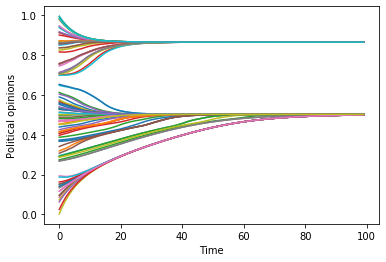

In [228]:
# Clear version
n_people = 100
n_time = 100
n_friends = 25
alpha = 0.2

opinion = np.zeros((n_time, n_people))
opinion[0, :] = np.random.uniform(size=n_people)

friends = {}
for i in range(n_people): # Find friends with roughly similar opinions
    queue = list(np.argsort(np.abs(opinion[0,:] - opinion[0,i])))
    queue.remove(i) # No self-friendship
    friends[i] = queue[:n_friends]

for t in range(1, n_time):
    for i in range(n_people):
        opinion[t, i] = (1-alpha)*opinion[t-1, i] + alpha*np.mean(opinion[t-1, friends[i]])
    for i in range(n_people):
        hist = {}                           # Find a person most popular with friends
        forbidden = set(friends[i] + [i])   # Those already befriended
        for j in friends[i]:
            for k in friends[j]:
                if k not in forbidden:
                    hist[k] = hist.get(k,0) + 1
        if hist: # This bubble is not too bubbly (still possible to add someone)
            best = max([(val,key) for key,val in hist.items()])[1]
            friends[i] += [best]
            queue = [friends[i][k] for k in np.argsort(np.abs(opinion[t, friends[i]] - opinion[t, i]))]
            worst = queue[-1]
            friends[i].remove(worst)

plt.plot(opinion);
plt.xlabel('Time');
plt.ylabel('Political opinions');